# Sentiment analysis with Random forest 
<p> Part 1 / 4 , download and clean reviews from the internet </p>

In [22]:
%matplotlib inline

# extraction from html document
import pandas as pd
from bs4 import BeautifulSoup
import requests
import nltk
import re
from nltk.corpus import stopwords # Import the stop word list
import json
import codecs
import random
import numpy as np
import matplotlib.pyplot as plt

### Hyperparams

In [23]:
stopword_vocabular = "english"
load_dataset_training = "/mnt/basket/processingData/data/labeledTrainData.tsv"
serialize_train_datafile = "/mnt/basket/processingData/volatile/clean_train_reviews.json"

### Load data set

In [24]:
train = pd.read_csv(load_dataset_training, header=0, delimiter="\t", quoting=3)
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size
print "dataset size: ", num_reviews
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

dataset size:  25000


### Data cleaning and text preprocessing for single customer review

In [25]:
# Convert a raw review to a string of words
def preprocess_review( raw_review ):
    # 1. Remove HTML
    #
    non_html = BeautifulSoup(raw_review,"html5lib").get_text()
    #
    # 1. Convert to lower case
    lowerCaseWords = non_html.lower()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-z]", " ", lowerCaseWords)
    #
    # 3. Split into individual words
    words = letters_only.split()
    #
    # 4. searching a set is faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words(stopword_vocabular))
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space
    return str(( " ".join( meaningful_words ))) # str() converts from UNICODE to ASCII

In [26]:
# Loop over each review; create an index i that goes from 0 to the length of the movie review list
for i in xrange( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of clean reviews
    clean_train_reviews.append( preprocess_review( train["review"][i] ) )
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_reviews )

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



### Serialize cleaned data

In [27]:
with codecs.open(serialize_train_datafile,  'w', encoding='utf-8') as f:
	json.dump(clean_train_reviews, f,  indent=3)

print "Data saved to disk"

Data saved to disk


### Show distribution of data

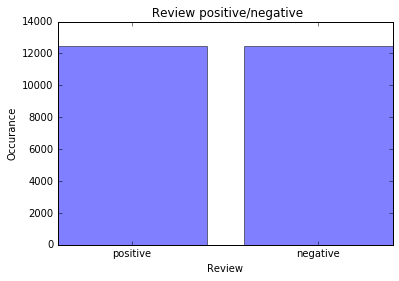

In [28]:
# to see how many positive and negative examples are there ( should be close numbers )
i = 0
results = [0,0]

# split in positive reviews and negaive reviews
for item in train["sentiment"]:
    if(item ==  1 ):
        results[0] = results[0]+1 # positive review
    else:
        results[1] = results[1]+1 # negative review
    i = i + 1

# plot
_classes = ['positive','negative']
y_pos = np.arange(len(_classes))
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.xticks(y_pos, _classes)
plt.ylabel('Occurance')
plt.xlabel('Review')
plt.title(' Review positive/negative')
plt.show()